In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [3]:
hectare_loss = np.array([5,3,2,4,12,17,21,43,18,94,105,58,10,16,3,16,0.619,5,4,7])
total_area = 1692
remaining = 1692
forest_left = []
for loss in hectare_loss:
    remaining = remaining-loss
    left = (remaining-loss)*100/1692
    forest_left.append(left)

In [4]:
len(forest_left)

20

In [5]:
train_X = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [6]:
train_Y = np.array(forest_left)

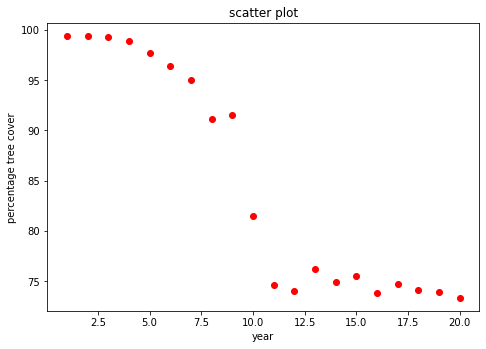

In [7]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(train_X, forest_left, color='r')
ax.set_xlabel('year')
ax.set_ylabel('percentage tree cover')
ax.set_title('scatter plot')
plt.show()

In [8]:
train_X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [9]:
train_Y

array([99.40898345, 99.3498818 , 99.29078014, 98.93617021, 97.75413712,
       96.45390071, 94.97635934, 91.13475177, 91.54846336, 81.50118203,
       74.64539007, 73.99527187, 76.24113475, 74.94089835, 75.53191489,
       73.8179669 , 74.69042553, 74.13599291, 73.95868794, 73.36767139])

In [10]:
train_X.shape

(20,)

In [11]:
train_X = train_X.reshape(20,1)

In [12]:
train_Y.shape

(20,)

In [13]:
train_Y.shape

(20,)

In [14]:
train_Y = train_Y.reshape(20,1)

In [15]:
train_Y.shape

(20, 1)

In [16]:
train_X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20]])

In [17]:
train_Y

array([[99.40898345],
       [99.3498818 ],
       [99.29078014],
       [98.93617021],
       [97.75413712],
       [96.45390071],
       [94.97635934],
       [91.13475177],
       [91.54846336],
       [81.50118203],
       [74.64539007],
       [73.99527187],
       [76.24113475],
       [74.94089835],
       [75.53191489],
       [73.8179669 ],
       [74.69042553],
       [74.13599291],
       [73.95868794],
       [73.36767139]])

In [18]:
#from sklearn.preprocessing import StandardScaler

In [19]:
#ss = StandardScaler()

In [20]:
#train_X = ss.fit_transform(train_x)
#train_Y = ss.fit_transform(train_y)

In [21]:
train_X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20]])

In [22]:
train_Y

array([[99.40898345],
       [99.3498818 ],
       [99.29078014],
       [98.93617021],
       [97.75413712],
       [96.45390071],
       [94.97635934],
       [91.13475177],
       [91.54846336],
       [81.50118203],
       [74.64539007],
       [73.99527187],
       [76.24113475],
       [74.94089835],
       [75.53191489],
       [73.8179669 ],
       [74.69042553],
       [74.13599291],
       [73.95868794],
       [73.36767139]])

In [23]:
inputs = keras.Input(shape=(train_X.shape[1],))
x = layers.Dense(10)(inputs)
x = layers.Dense(10)(x)
x = layers.Dense(10)(x)
x = layers.Dense(10)(x)
x = layers.Dense(1)(x)



In [24]:
inputs.shape

TensorShape([None, 1])

In [25]:
tf.keras.backend.clear_session()

In [26]:
model = keras.Model(inputs=inputs, outputs=x, name="forest_cover")

In [27]:
model.summary()

Model: "forest_cover"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable 

In [28]:
model.compile(loss=keras.losses.MeanSquaredError(), optimizer = keras.optimizers.Adam(learning_rate=0.1), metrics = ["mae", "mse"])

In [29]:
tf.keras.backend.clear_session()

In [30]:
history = model.fit(train_X, train_Y, batch_size=64, epochs=150, validation_split=0.2)

Epoch 1/150
1/1 [==============================] - 1s 994ms/step - loss: 6413.8320 - mae: 78.6163 - mse: 6413.8320 - val_loss: 14511.0312 - val_mae: 119.8629 - val_mse: 14511.0312
Epoch 2/150
1/1 [==============================] - 0s 42ms/step - loss: 3340.3179 - mae: 50.9524 - mse: 3340.3179 - val_loss: 1064.6309 - val_mae: 32.4975 - val_mse: 1064.6309
Epoch 3/150
1/1 [==============================] - 0s 48ms/step - loss: 5032.9326 - mae: 67.9178 - mse: 5032.9326 - val_loss: 579.4017 - val_mae: 23.2912 - val_mse: 579.4017
Epoch 4/150
1/1 [==============================] - 0s 46ms/step - loss: 2740.9512 - mae: 42.2359 - mse: 2740.9512 - val_loss: 11636.6953 - val_mae: 107.3289 - val_mse: 11636.6953
Epoch 5/150
1/1 [==============================] - 0s 50ms/step - loss: 2798.6743 - mae: 46.7666 - mse: 2798.6743 - val_loss: 10586.2012 - val_mae: 102.3640 - val_mse: 10586.2012
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 2607.8062 - mae: 45.1814 - mse: 2607.806

In [31]:
history.history

{'loss': [6413.83203125,
  3340.31787109375,
  5032.9326171875,
  2740.951171875,
  2798.67431640625,
  2607.80615234375,
  2034.7178955078125,
  2379.5439453125,
  2401.47216796875,
  1952.9110107421875,
  1623.16943359375,
  1840.677490234375,
  1683.9598388671875,
  1296.8162841796875,
  1290.3358154296875,
  1308.6025390625,
  1078.0340576171875,
  769.6732177734375,
  698.304443359375,
  592.8553466796875,
  261.1929931640625,
  233.30291748046875,
  231.30484008789062,
  16.97861671447754,
  280.55206298828125,
  179.08338928222656,
  346.365234375,
  238.26759338378906,
  128.64007568359375,
  116.95150756835938,
  17.250272750854492,
  52.982242584228516,
  108.01416015625,
  88.23635864257812,
  73.22974395751953,
  112.05276489257812,
  116.68580627441406,
  75.30463409423828,
  66.0343017578125,
  70.0016098022461,
  42.65060043334961,
  16.854259490966797,
  28.782899856567383,
  32.33938980102539,
  23.091230392456055,
  40.26496505737305,
  47.35700225830078,
  32.5902214

In [32]:
test_scores = model.evaluate(train_X, train_Y)


1/1 [==============================] - 0s 26ms/step - loss: 25.2973 - mae: 4.1535 - mse: 25.2973


In [33]:
len(history.history["loss"])

150

In [34]:
import matplotlib.pyplot as plt

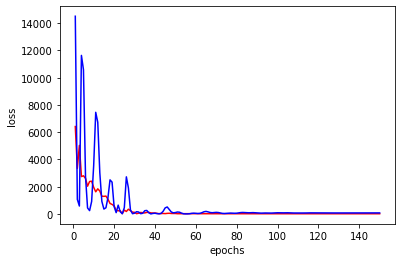

In [35]:
x = [i+1 for i in range(150)]
plt.plot(x,history.history["loss"],"r")
plt.plot(x,history.history["val_loss"],"b")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [36]:
prediction = model.predict(train_X)

In [37]:
print(prediction)

[[103.83334 ]
 [101.651306]
 [ 99.46927 ]
 [ 97.28724 ]
 [ 95.10521 ]
 [ 92.92315 ]
 [ 90.74113 ]
 [ 88.55908 ]
 [ 86.37705 ]
 [ 84.195   ]
 [ 82.01297 ]
 [ 79.83093 ]
 [ 77.64891 ]
 [ 75.466866]
 [ 73.28482 ]
 [ 71.10279 ]
 [ 68.920746]
 [ 66.73871 ]
 [ 64.55667 ]
 [ 62.374634]]


In [38]:
train_Y

array([[99.40898345],
       [99.3498818 ],
       [99.29078014],
       [98.93617021],
       [97.75413712],
       [96.45390071],
       [94.97635934],
       [91.13475177],
       [91.54846336],
       [81.50118203],
       [74.64539007],
       [73.99527187],
       [76.24113475],
       [74.94089835],
       [75.53191489],
       [73.8179669 ],
       [74.69042553],
       [74.13599291],
       [73.95868794],
       [73.36767139]])

In [39]:
year = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

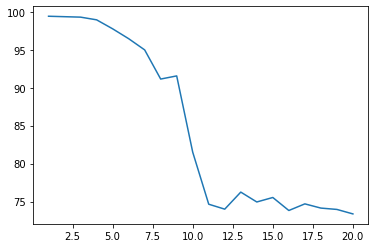

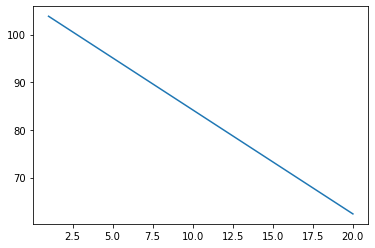

In [40]:
plt.plot(year, train_Y)
plt.show()
plt.plot(year, prediction)
plt.show()